### Step 0: Importing necessary libraries

In [63]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

### Step 1: Reading the dataset

In [64]:
df = pd.read_csv("Restaurant_revenue.csv")
print(df["Cuisine_Type"].unique())
display(df.head(10))
df.info()

['Japanese' 'Italian' 'American' 'Mexican']


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
6,96,35.350343,16.960318,American,20.181622,0,86,496.653687
7,84,46.314645,14.486349,Italian,28.921100,1,1,417.158607
8,84,22.647863,15.841873,American,11.732611,0,26,352.148065
9,97,33.532267,8.095969,Italian,37.973579,0,98,272.793517


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


### Step 2: Cleaning up the dataset

In [65]:
original_records = df.shape[0]
df = df.dropna(how="any")
print(original_records - df.shape[0], "records have been dropped.")

df = pd.get_dummies(df)
df.head()

0 records have been dropped.


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type_American,Cuisine_Type_Italian,Cuisine_Type_Japanese,Cuisine_Type_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,False,False,True,False
1,24,40.020077,4.577892,17.952562,0,36,221.319091,False,True,False,False
2,81,41.981485,4.652911,22.600420,1,91,326.529763,False,False,True,False
3,70,43.005307,4.416053,18.984098,1,59,348.190573,False,True,False,False
4,30,17.456199,3.475052,12.766143,1,30,185.009121,False,True,False,False


### Step 3: Train/test/validation split

In [66]:
X = df.drop(columns="Monthly_Revenue")
y = df["Monthly_Revenue"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Step 4: Creating neural network

In [67]:
variable_amount = len(X.columns)

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dense(24, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\zsolt\OneDrive - Óbudai egyetem\Deep Learning\deeplearning\.venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,761 (10.79 KB)

 Trainable params: 2,741 (10.71 KB)

 Non-trainable params: 20 (80.00 B)

### Step 5: Fitting data to neural netwrok

Epoch 1/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 85043.7344 - val_loss: 79778.0703
Epoch 2/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 84661.8438 - val_loss: 78579.1250
Epoch 3/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83127.7344 - val_loss: 74074.3828
Epoch 4/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 76174.1875 - val_loss: 56748.8867
Epoch 5/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 51127.6211 - val_loss: 14354.0703
Epoch 6/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16851.9980 - val_loss: 16640.4160
Epoch 7/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9278.5264 - val_loss: 8196.1133
Epoch 8/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6962.1323 - val_loss: 8356.7021
Epoch 9/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6019.7344 - val_loss: 6766.5952
Epoch 10/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5647.6963 - val_loss: 5790.9878
Epoch 11/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5307.0903 - va

<Axes: >

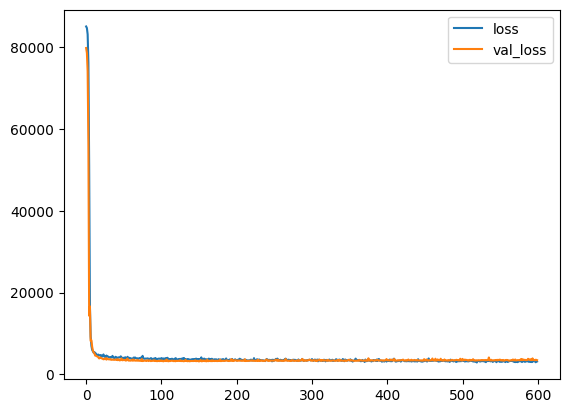

In [68]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_val, y_val))
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

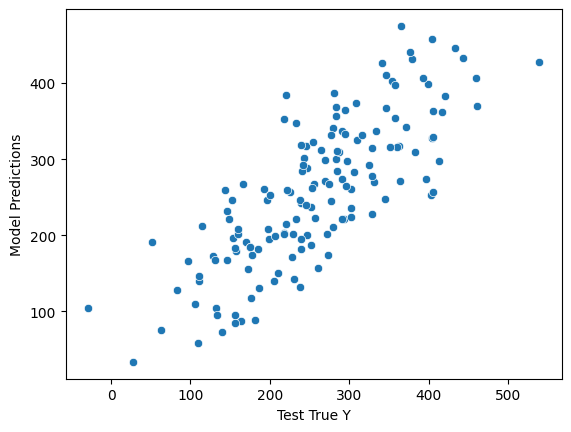

In [69]:

# get test predictions
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

C:\Users\zsolt\AppData\Local\Temp\ipykernel_22992\1091839839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


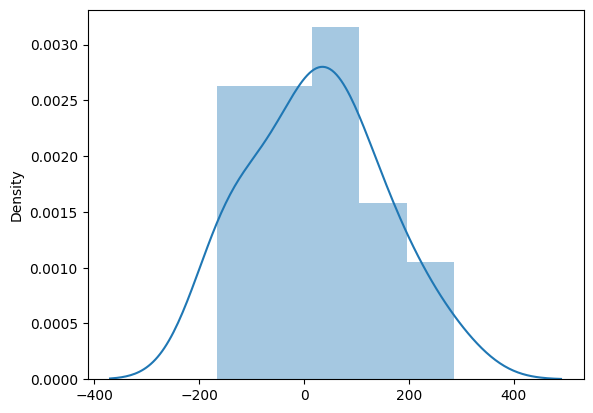

In [70]:


sns.distplot((y_test - test_predictions))
plt.show()
plt.close()